In [2]:
import sys
import pandas as pd
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import nltk
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import gensim 
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


#### 네이버 영화 불러오기

In [3]:
movie_n = pd.read_csv('naver_movie_192021.csv')

In [4]:
movie_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235785 entries, 0 to 235784
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         235785 non-null  object
 1   genre         235785 non-null  object
 2   nation        235785 non-null  object
 3   running_time  235785 non-null  object
 4   release_date  235785 non-null  object
 5   director      235785 non-null  object
 6   actor         235785 non-null  object
 7   grade         235785 non-null  object
 8   summary       235785 non-null  object
 9   poster        235785 non-null  object
 10  score         235785 non-null  int64 
 11  content       235785 non-null  object
 12  write_date    235785 non-null  object
 13  source_site   235785 non-null  object
dtypes: int64(1), object(13)
memory usage: 25.2+ MB


## 데이터 정보
* title : 영화 제목
* genre : 장르
* nation : 국가
* running_time : 러닝타임
* release_date : 개봉일
* director : 감독
* actor : 출연진
* grade : 관람가 등급
* summary : 줄거리
* poster : 포스터 url
* score : 평점
* content : 리뷰 내용
* write_date : 리뷰 작성일
* source_site : 플랫폼

In [ ]:
# Test 데이터 구조 탐색 및 출력 결과 확인

In [28]:
a = movie_n[movie_n['title']=='기생충']['content']

In [30]:
a = a.tolist()

In [32]:
a[0]

'비에 젖지 않는 고급 장난감 텐트와, 비에 젖다 못해 잠겨버리는 반지하 가구'

In [33]:
nounss = okt.nouns(a[0])

In [34]:
nounsss

['비', '고급', '장난감', '텐트', '비', '반지하', '가구']

In [ ]:
### 장르가 애니메이션인 영화만 변수에 담기

In [4]:
ani = movie_n[movie_n['genre'].str.contains('애니메이션')]

In [ ]:
### 장르가 애니메이션인 리뷰만 변수에 담기

In [5]:
anicontent = ani['content']

In [ ]:
### txt 파일로 저장 

In [6]:
anicontent.to_csv('test_a.txt',index=False)

In [ ]:
### 불러오기

In [7]:
f = open('test_a.txt','r',encoding='utf-8')
rev = f.read()

## 불용어 처리
* `영화` 단어까지 포함 (자주 언급)

In [16]:
stop_words = list(set(stop_words))

## wordcloud 시각화해서 단어 확인하기
* Konlpy의 Okt로 형태소 분석 분류, `명사`만 추출
* 단어의 길이가 하나인 경우 제외
* `빈도 수` 세기

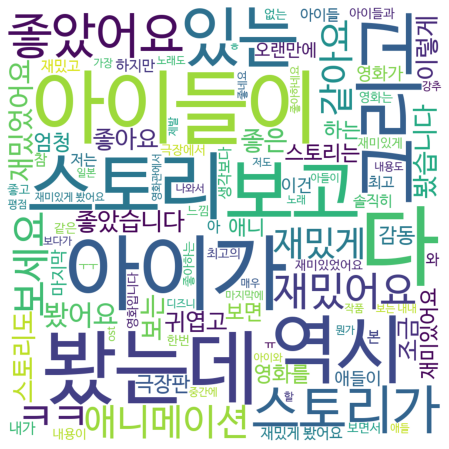

In [17]:
def get_noun(filename):
    f = open(filename,'r',encoding='utf-8')
    rev = f.read()
    # okt
    okt = Okt()
    noun = okt.nouns(rev)
    for i,v in enumerate(noun):
        if len(v)<2:
            noun.pop(i)

    count = Counter(noun)

    # 명사 빈도 카운트
    noun_list = count.most_common(100)
    return noun_list

def wordCloud(noun_list):
    wc = WordCloud(font_path='NanumBarunGothic.ttf',
                    width=1000,
                    height=1000,
                    max_words=100,
                    max_font_size=200,
                    background_color='white',
                    stopwords=stop_words)#.generate_from_frequencies(dict(data))
    wc.generate(rev)
    plt.figure(figsize=(24, 8))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

if __name__=="__main__":
    filename= 'test_a.txt'
    wordCloud(get_noun(filename))

In [ ]:
wc.generate_from_frequencies(dict(noun_list))
wc.to_file('wordcloud_rev.png')

---

## 한글자인 명사 제외
* 결과 출력해보기

In [21]:
f = open('test_a.txt','r',encoding='utf-8')
rev = f.read()

# okt
okt = Okt()
noun = okt.nouns(rev)
for i,v in enumerate(noun):
    if len(v)<2:
        noun.pop(i)
        
count = Counter(noun)

# 명사 빈도 카운트
noun_list = count.most_common(100)
for v in noun_list:
    if v[0] not in stop_words:
        print(v)

('아이', 4875)
('스토리', 2510)
('감동', 2384)
('보고', 1491)
('어른', 1298)
('최고', 1191)
('애니메이션', 1091)
('보기', 1049)
('애니', 1043)
('극장판', 992)
('노래', 987)
('캐릭터', 948)
('재미', 912)
('아들', 879)
('영상', 771)
('역시', 731)
('마지막', 721)
('더빙', 706)
('느낌', 669)
('추천', 656)
('작품', 641)
('기대', 639)
('장면', 637)
('이야기', 572)
('일본', 572)
('처음', 571)
('눈물', 560)
('연출', 519)
('가족', 500)
('작화', 492)
('집중', 483)
('디즈니', 477)
('평점', 458)
('극장', 456)
('마음', 451)
('인생', 444)
('부분', 431)
('이번', 423)
('영화관', 422)
('사랑', 421)
('조금', 417)
('한번', 416)
('음악', 408)
('별로', 404)
('상영', 402)
('한국', 396)
('시리즈', 373)
('이해', 370)
('친구', 367)
('액션', 362)
('성우', 342)
('목소리', 340)
('개봉', 339)
('짱구', 329)
('엄마', 320)
('개연', 318)
('전개', 309)
('관람', 309)
('원작', 308)
('추억', 308)
('코난', 298)
('엔딩', 290)
('이상', 289)
('이건', 286)
('만화', 273)
('감독', 270)
('불매', 269)
('그림', 267)
('주인공', 266)
('강추', 264)
('내내', 258)
('연기', 256)
('역대', 245)
('기분', 244)
('표현', 238)


In [ ]:
### 구조 확인

In [22]:
display(v, v[0])

('표현', 238)

'표현'

### 함수를 위한 코드 정리

In [23]:
sw_list=[]
f = open('test_a.txt','r',encoding='utf-8')
rev = f.read()

# okt
okt = Okt()
noun = okt.nouns(rev)
for i,v in enumerate(noun):
    if len(v)<2:
        noun.pop(i)
        
count = Counter(noun)

# 명사 빈도 카운트
noun_list = count.most_common(100)
for v in noun_list:
    if v[0] not in stop_words:
        sw_list.append(v)

In [24]:
# 데이터 프레임 생성
df = pd.DataFrame(sw_list, columns =['noun', 'count'])
  
df.head(20)

,noun,count
0,아이,4875
1,스토리,2510
2,감동,2384
3,보고,1491
4,어른,1298
5,최고,1191
6,애니메이션,1091
7,보기,1049
8,애니,1043
9,극장판,992


In [ ]:
filename = ''
f = open(filename,'r',encoding='utf-8')

In [ ]:
# 애니메이션 영화 목록

In [46]:
ani.groupby('title')['title'].count().sort_values(ascending=False)[:10]

title
드래곤 길들이기 3                        490
언더독                               490
극장판 공룡메카드: 타이니소어의 섬               490
드래곤볼 슈퍼: 브로리                      490
레드슈즈                              489
천로역정: 천국을 찾아서                     488
주먹왕 랄프 2: 인터넷 속으로                 487
페이트 스테이 나이트 헤븐즈필 제2장 로스트 버터플라이    487
뽀로로 극장판 보물섬 대모험                   487
미래의 미라이                           486
Name: title, dtype: int64

## def get_noun
* name : 영화의 제목을 입력 
* 애니메이션에 해당하는 목록 중 입력된 영화 제목과 일치하는 리뷰의 단어 빈도 수를 데이터 프레임으로 생성
* noun : 명사
* count : 빈도 수

In [51]:
def get_noun(name):
    s_list = []
    s = ani[ani['title']==name]['content'] # input의 name과 같은 영화의 리뷰들만 추출 
    s = s.tolist() # 리뷰들을 리스트화 
    mid = []
    for i in range(0,len(s)): # 리뷰들의 형태소 분류 및 최소 길이 미만 제거 
        noun = okt.nouns(s[i])
        for i,v in enumerate(noun):
            if len(v)<2:
                noun.pop(i)
        mid+=noun
        
        count = Counter(noun) # 단어별 개수
        noun_list = count.most_common(100)  # (리뷰 하나의)최빈 단어
        for v in noun_list: # (리뷰 하나의) 단어 list에서 불용어 제거 
            if v[0] not in stop_words:
                s_list.append(v) # 유효단어 추출후 append 
                
    # 리뷰별로 반복
    df= pd.DataFrame(s_list, columns =['noun', 'count'])
    df['title']= name # 영화 제목 추가
    return df

In [ ]:
# 뽀로로 극장판 보물섬 대모험에 해당하는 리뷰에서 (불용어를 제거한) 가장 많이 쓰인 단어 

In [74]:
get_noun('뽀로로 극장판 보물섬 대모험').sort_values(by='count',ascending=False)

,noun,count,title
0,아이,144,뽀로로 극장판 보물섬 대모험
1,뽀로로,108,뽀로로 극장판 보물섬 대모험
2,역시,40,뽀로로 극장판 보물섬 대모험
3,집중,36,뽀로로 극장판 보물섬 대모험
4,아들,36,뽀로로 극장판 보물섬 대모험
...,...,...,...
74,예매,4,뽀로로 극장판 보물섬 대모험
73,대통령,4,뽀로로 극장판 보물섬 대모험
72,감상,4,뽀로로 극장판 보물섬 대모험
71,시작,4,뽀로로 극장판 보물섬 대모험


---

In [ ]:
# 겨울왕국 2 에 해당하는 리뷰에서 (불용어를 제거한) 가장 많이 쓰인 단어 

In [75]:
get_noun('겨울왕국 2').sort_values(by='count',ascending=False).head(50)

,noun,count,title
0,스토리,104,겨울왕국 2
1,노래,81,겨울왕국 2
2,엘사,71,겨울왕국 2
3,겨울왕국,43,겨울왕국 2
4,느낌,32,겨울왕국 2
5,아이,32,겨울왕국 2
6,영상,30,겨울왕국 2
7,역시,29,겨울왕국 2
8,디즈니,28,겨울왕국 2
10,감동,27,겨울왕국 2


# 전체 영화
> 전체 영화 목록에 해당하는 영화 제목을 전부 검색한 뒤 <br>
> 해당 영화의 리뷰에서 등장하는 단어들의 빈도 수를 확인

### 전체 영화 목록 데이터 프레임 구조

In [76]:
movie_n.head(1)

,title,genre,nation,running_time,release_date,director,actor,grade,summary,poster,score,content,write_date,source_site
0,0.0MHz,공포,한국,102분,2019 .05.29 개봉,유선동,"정은지(소희), 이성열(상엽), 최윤영(윤정)",15세 관람가,"에디슨의 마지막 발명품, 유령 탐지기?\n “증명할 수 없는 미스터리란 없다”\n ...",https://movie-phinf.pstatic.net/20190517_285/1...,1,와 정말 무서운집 수준의 공포영화가 한국에 다시 나왔네요. 꼭 보러 가세요.착석하신...,2019.05.29 13:30,naver


### a = 전체 영화의 제목을 리스트로 저장

In [83]:
a = movie_n.title.unique().tolist()

In [84]:
a[0]

'0.0MHz'

#### name → a 

In [106]:
def get_noun(name):
    s_list = []
    s = movie_n[movie_n['title']==name]['content'] # input의 name과 같은 영화의 리뷰들만 추출 
    s = s.tolist() # 리뷰들을 리스트화 
    mid = []
    for i in range(0,len(s)): # 리뷰들의 형태소 분류 및 최소 길이 미만 제거 
        noun = okt.nouns(s[i])
        for i,v in enumerate(noun):
            if len(v)<2:
                noun.pop(i)
        mid+=noun

    count = Counter(mid) # 단어별 개수
    noun_list = count.most_common(100) # (리뷰 하나의)최빈 단어
    for v in noun_list: # (리뷰 하나의) 단어 list에서 불용어 제거 
        if v[0] not in stop_words:
            s_list.append(v) # 유효단어 추출후 append 
    # 리뷰별로 반복

    df= pd.DataFrame(s_list, columns =['noun', 'count'])
    df['title']=name
    return df

> 반복문을 돌며 영화를 검색하고 해당하는 단어의 빈도수를 상위 50개까지만 담는다.

In [107]:
results = []
for i in range(0,len(a)):
    results.append(get_noun(a[i]).sort_values(by='count',ascending=False).head(50))    

#### 데이터프레임 생성

In [93]:
pd.concat(results).reset_index(drop=True)

,noun,count,title
0,스토리,104,겨울왕국 2
1,노래,81,겨울왕국 2
2,엘사,71,겨울왕국 2
3,겨울왕국,43,겨울왕국 2
4,느낌,32,겨울왕국 2
...,...,...,...
8165,소년,3,해변의 에트랑제
8166,배경,3,해변의 에트랑제
8167,대사,3,해변의 에트랑제
8168,취향,3,해변의 에트랑제


In [ ]:
### 변수담기

In [108]:
keyword = pd.concat(results).reset_index(drop=True)

In [ ]:
#### 데이터 columns 순서 변경

In [111]:
keyword = keyword[['title','noun','count']]

#### csv 파일 저장

In [112]:
keyword.to_csv('word_count.csv',index=False)

---